1. 도메인 정보 파악
    - 명주쌤이 해주심!
2. 데이터 특성 파악 후 전처리
    1) 결측치
        - isnull().sum() -> 조회 안되지만 0값 존재하므로 확인 필요
    2) 이상치
        -
    3) 변수간 상관관계
        - 압연온도, 균열대 재로시간
3. 그래프를 통한 데이터 분석
4. 모델링/요약
5. 핵심인자 도출
6. 경쟁력 확보 방안 도출
7. 배운점/느낀점

![image.png](attachment:image.png)

In [20]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
df = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/SCALE불량.csv",encoding='euc-kr')
df.head()

plate_no        rolling_date scale   spec_long spec_country steel_kind  \
0  PLT_1001  03JAN2023:07:07:53    양품  AB/EH32-TM           미국          T   
1  PLT_1002  03JAN2023:07:21:22    양품  AB/EH32-TM           미국          T   
2  PLT_1003  03JAN2023:07:31:15    양품   NV-E36-TM           영국          T   
3  PLT_1004  03JAN2023:07:41:01    양품   NV-E36-TM           영국          T   
4  PLT_1005  03JAN2023:07:52:40    양품  BV-EH36-TM          프랑스          T   

   pt_thick  pt_width  pt_length hsb  ... fur_input_row fur_heat_temp  \
0        32      3700      15100  적용  ...            1열          1144   
1        32      3700      15100  적용  ...            2열          1144   
2        33      3600      19200  적용  ...            1열          1129   
3        33      3600      19200  적용  ...            2열          1152   
4        38      3100      13300  적용  ...            1열          1140   

   fur_heat_time  fur_soak_temp  fur_soak_time  fur_total_time  \
0            116           1133             59             259   
1            122           1135             53             238   
2            116           1121             55             258   
3            125           1127             68             266   
4            134           1128             48             246   

   rolling_method rolling_temp  descaling_count  work_group  
0      TMCP(온도제어)          934                8          1조  
1      TMCP(온도제어)          937                8          1조  
2      TMCP(온도제어)          889                8          1조  
3      TMCP(온도제어)          885                8          1조  
4      TMCP(온도제어)          873                8          1조  

[5 rows x 21 columns]

In [22]:
df['scale'].replace({"양품":0,"불량":1},inplace=True)

In [23]:
df.columns

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

###  컬럼 제거

In [24]:
df.drop(columns=['plate_no','spec_long','spec_country'],axis=1,inplace=True)

In [25]:
df.head()

rolling_date  scale steel_kind  pt_thick  pt_width  pt_length hsb  \
0  03JAN2023:07:07:53      0          T        32      3700      15100  적용   
1  03JAN2023:07:21:22      0          T        32      3700      15100  적용   
2  03JAN2023:07:31:15      0          T        33      3600      19200  적용   
3  03JAN2023:07:41:01      0          T        33      3600      19200  적용   
4  03JAN2023:07:52:40      0          T        38      3100      13300  적용   

  fur_no fur_input_row  fur_heat_temp  fur_heat_time  fur_soak_temp  \
0    1호기            1열           1144            116           1133   
1    1호기            2열           1144            122           1135   
2    2호기            1열           1129            116           1121   
3    2호기            2열           1152            125           1127   
4    3호기            1열           1140            134           1128   

   fur_soak_time  fur_total_time rolling_method  rolling_temp  \
0             59             259     TMCP(온도제어)           934   
1             53             238     TMCP(온도제어)           937   
2             55             258     TMCP(온도제어)           889   
3             68             266     TMCP(온도제어)           885   
4             48             246     TMCP(온도제어)           873   

   descaling_count work_group  
0                8         1조  
1                8         1조  
2                8         1조  
3                8         1조  
4                8         1조

### 압연 온도 -> 0 제거

In [26]:
df = df[df['rolling_temp'] != 0]

### boxplot

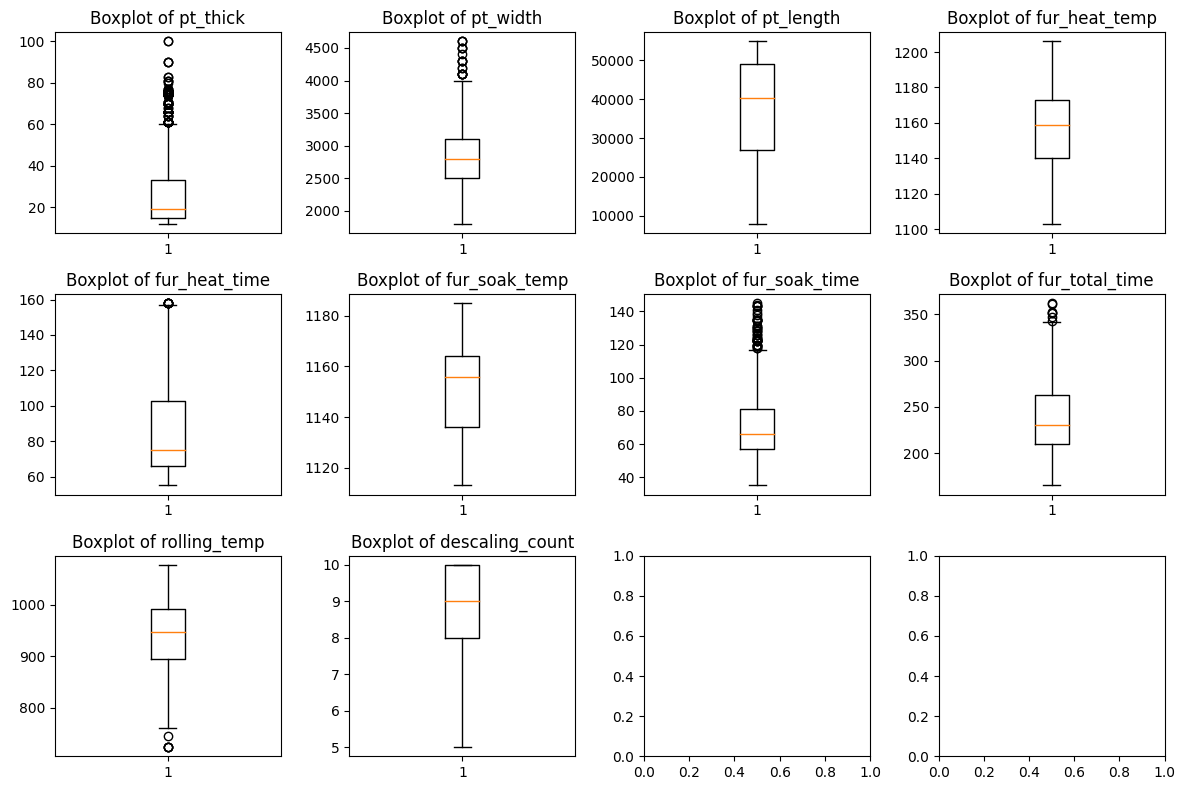

In [27]:
# 이상치 확인
variables = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
             'fur_total_time', 'rolling_temp', 'descaling_count']

# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))  # 3행 4열의 subplot 생성
axes = axes.flatten()  # 2차원 배열을 1차원으로 펼치기

for i, variable in enumerate(variables):
    axes[i].boxplot(df[variable])
    axes[i].set_title(f"Boxplot of {variable}")

# subplot 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

### 설명변수간 상관관계

/tmp/ipykernel_33705/3935983295.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

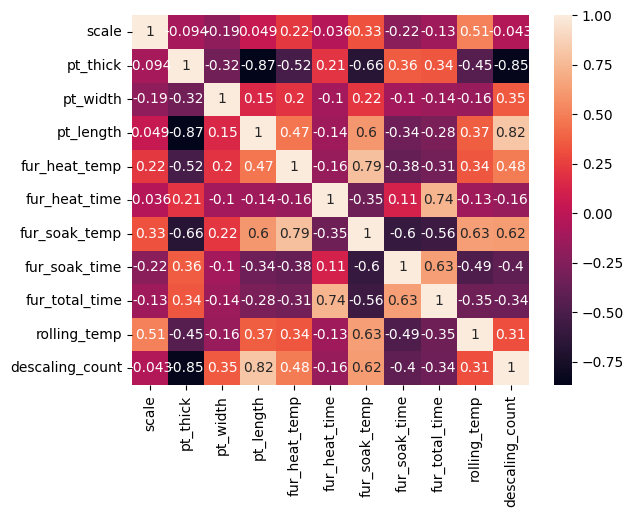

In [28]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,annot=True)

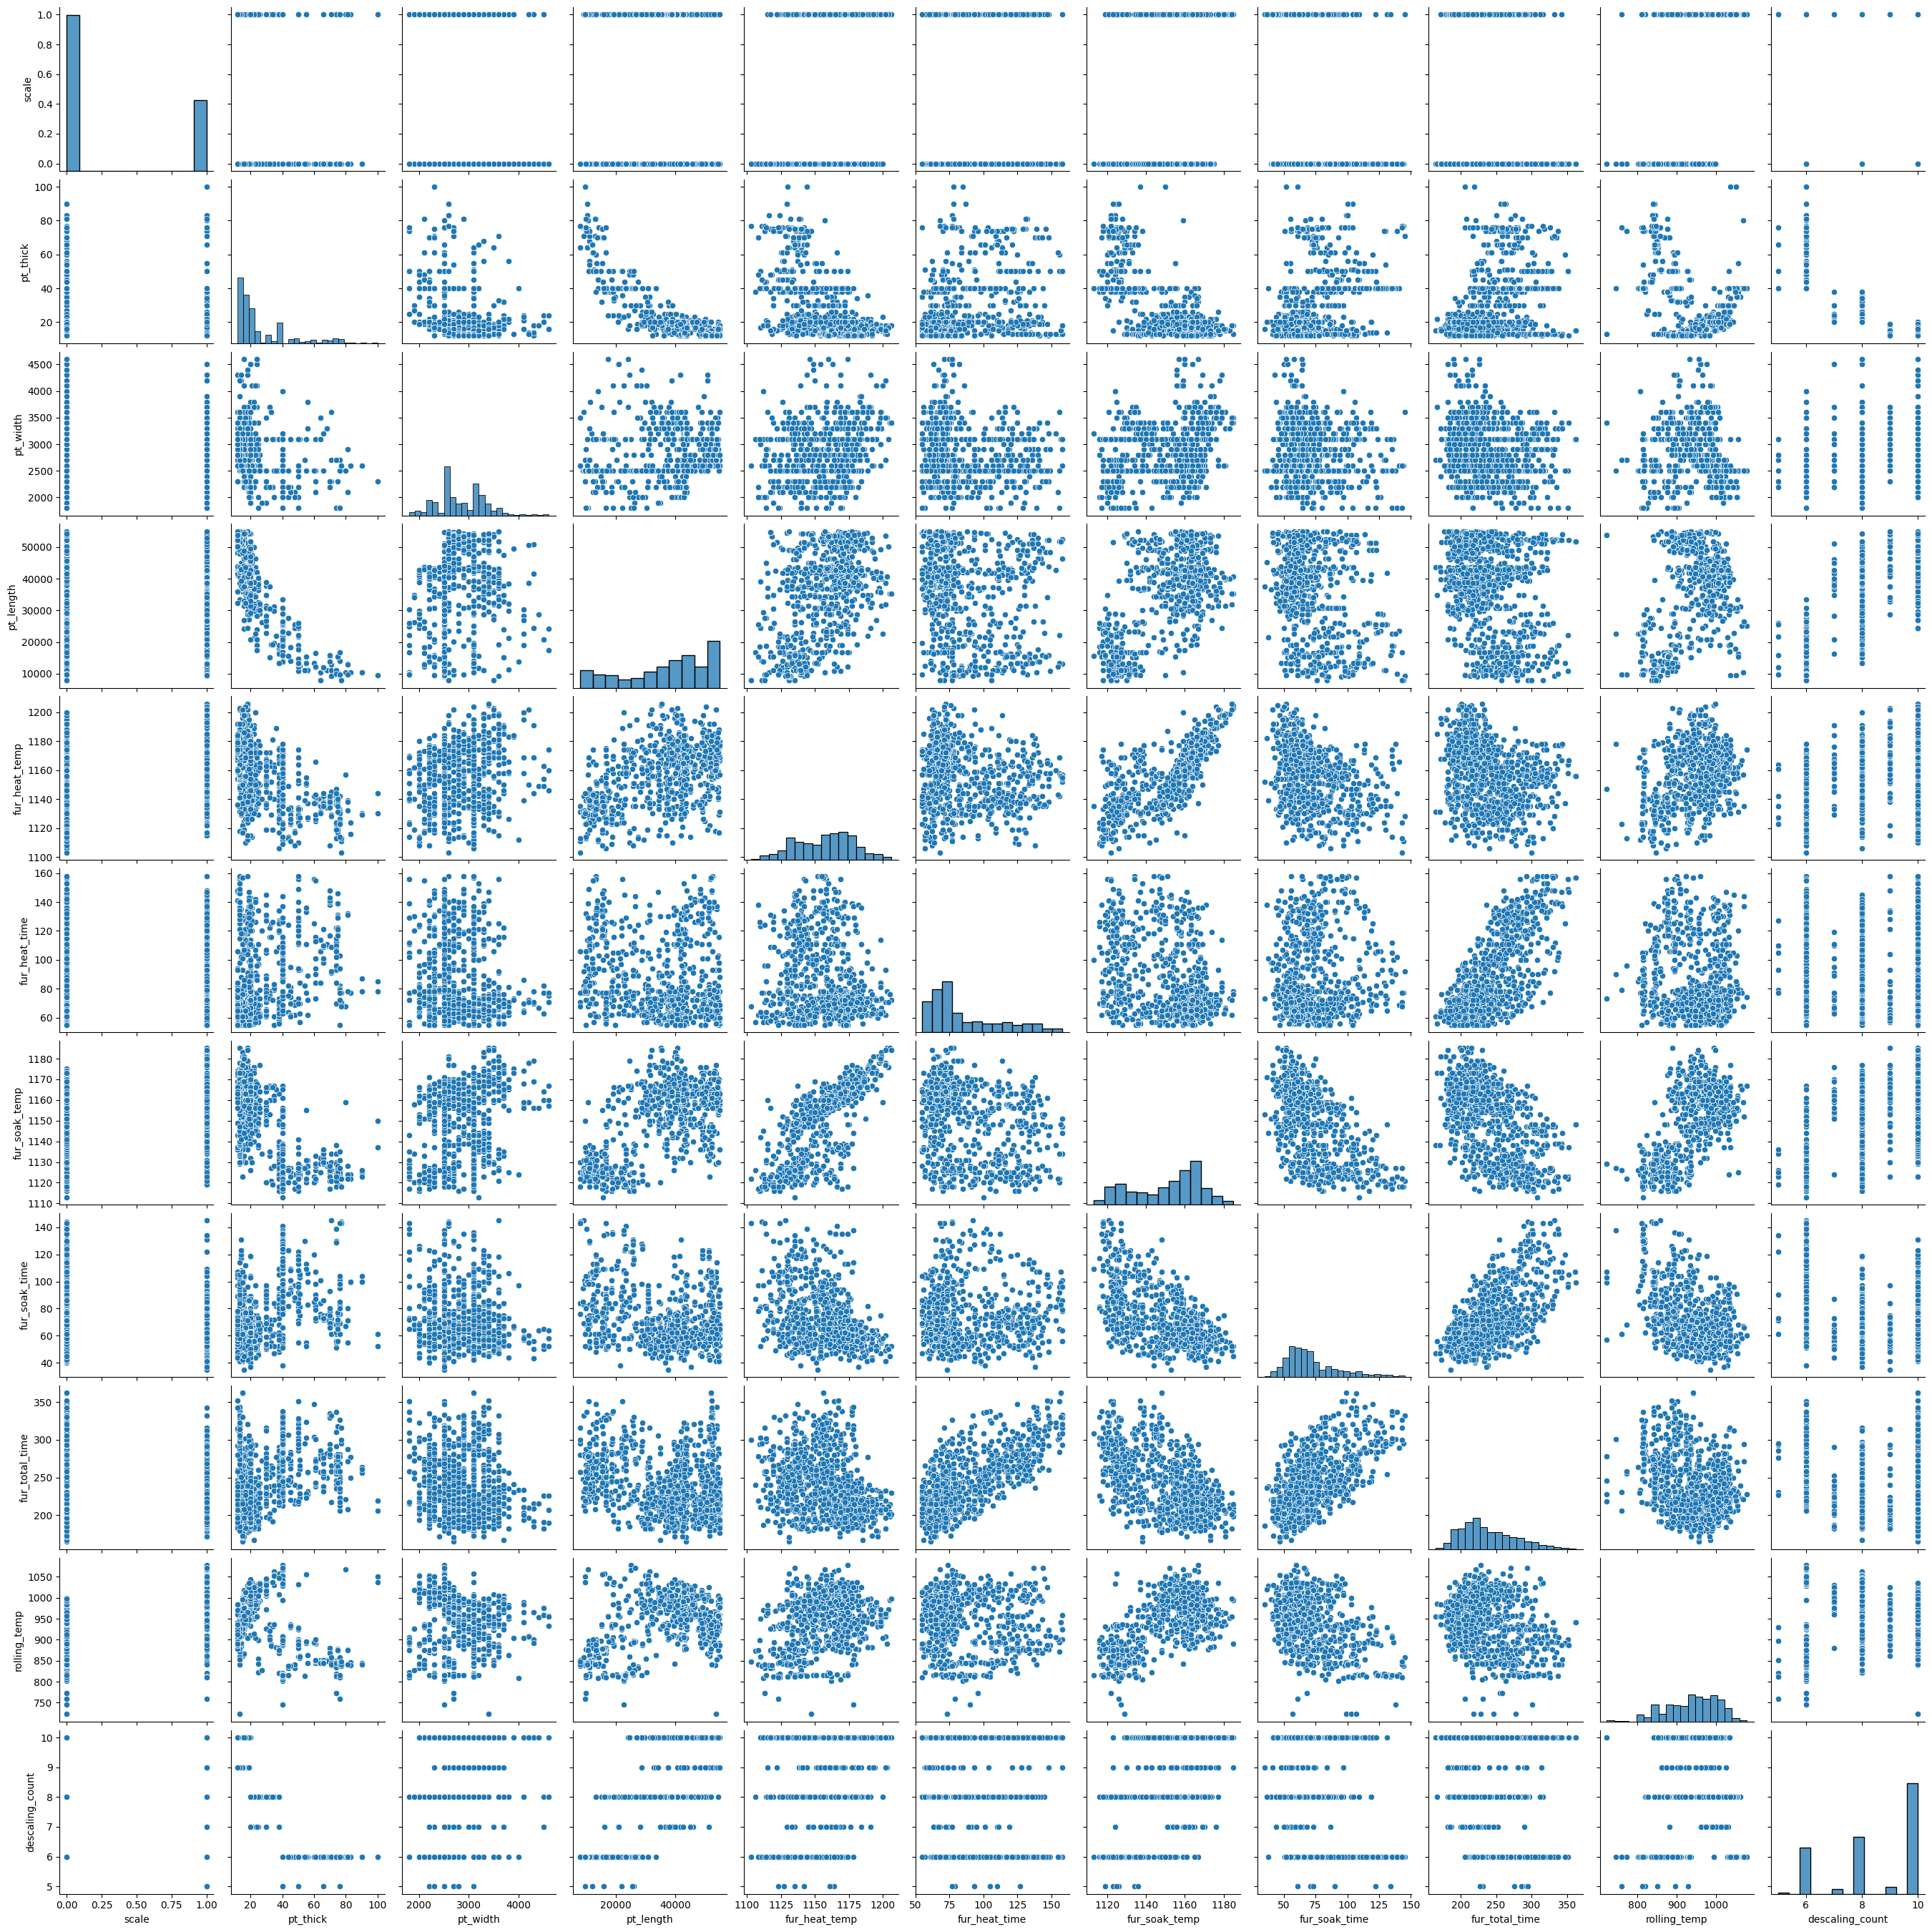

In [29]:
sns.pairplot(df)

In [30]:
df[df['fur_soak_time'] > 120]

rolling_date  scale steel_kind  pt_thick  pt_width  pt_length  hsb  \
122  04JAN2023:03:50:27      0          C        14      3300      51200   적용   
123  04JAN2023:03:58:56      0          C        14      3300      51200   적용   
131  04JAN2023:05:15:37      0          C        14      3300      49100   적용   
134  04JAN2023:05:36:58      0          C        14      3100      41800   적용   
536  07JAN2023:01:00:02      0          T        40      2800      23400   적용   
537  07JAN2023:01:07:14      0          T        40      2600      23400   적용   
538  07JAN2023:01:16:14      1          T        40      2500      25600  미적용   
542  07JAN2023:02:01:35      0          T        40      2500      25600   적용   
543  07JAN2023:02:12:52      0          T        40      2500      25600   적용   
544  07JAN2023:02:18:55      0          T        40      2500      22700   적용   
545  07JAN2023:02:24:03      0          T        44      2200      22800   적용   
546  07JAN2023:02:35:21      0          T        44      2200      22800   적용   
549  07JAN2023:03:06:44      0          T        40      2500      22700   적용   
550  07JAN2023:03:13:04      0          T        40      3100      18700   적용   
551  07JAN2023:03:22:46      0          T        40      2500      16900   적용   
552  07JAN2023:03:34:39      0          T        40      1800      18900   적용   
553  07JAN2023:03:49:31      0          T        50      1800      24900   적용   
554  07JAN2023:04:03:42      0          T        40      2500      28600   적용   
555  07JAN2023:04:10:03      0          T        40      2500      28600   적용   
556  07JAN2023:04:21:11      0          T        40      2300      25500   적용   
557  07JAN2023:04:31:03      1          T        40      2300      25500   적용   
562  07JAN2023:05:20:25      0          T        40      2000      28900   적용   
563  07JAN2023:05:29:47      0          T        40      2000      28900   적용   
602  07JAN2023:12:23:20      0          T        40      3100      23000   적용   
603  07JAN2023:12:35:58      0          T        40      3100      23000   적용   
609  07JAN2023:13:32:14      1          T        40      3100      15800   적용   
610  07JAN2023:13:43:13      0          T        40      2900      18700   적용   
611  07JAN2023:13:53:59      0          T        40      2900      18700   적용   
612  07JAN2023:14:07:43      1          T        71      3600       9200  미적용   
613  07JAN2023:14:20:48      0          T        74      2700      11000   적용   
614  07JAN2023:14:29:33      0          T        74      2700      11000   적용   
615  07JAN2023:14:37:17      0          T        54      2700      11000   적용   
616  07JAN2023:14:43:35      0          T        77      2600       7900   적용   
617  07JAN2023:14:52:54      0          T        77      2600       7900   적용   
618  07JAN2023:14:58:32      0          T        77      2600       7900   적용   
619  07JAN2023:15:05:39      0          T        74      1800      10000   적용   
620  07JAN2023:15:19:34      0          T        76      1800      16700   적용   

    fur_no fur_input_row  fur_heat_temp  fur_heat_time  fur_soak_temp  \
122    1호기            2열           1142             74           1132   
123    2호기            1열           1142             75           1131   
131    1호기            2열           1133             69           1143   
134    3호기            1열           1129             65           1148   
536    1호기            1열           1156             77           1128   
537    2호기            2열           1166             69           1118   
538    2호기            1열           1149             73           1119   
542    1호기            2열           1135             75           1120   
543    2호기            1열           1151             93           1121   
544    2호기            2열           1174             91           1118   
545    1호기            2열           1149             82           1126   
546    1호기            2열           1149             82  

In [31]:
pd.pivot_table(data=df,index='scale',columns='rolling_method',values='work_group',aggfunc='count')

rolling_method  CR(제어압연)  TMCP(온도제어)
scale                               
0                    539         145
1                    297          13

In [32]:
pd.pivot_table(data=df,index='scale',columns='work_group',values='plate_no',aggfunc='count')

KeyError: 'plate_no'

In [ ]:
# df['rolling_date'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')

# df['month'] = df['rolling_date'].dt.month

In [33]:
df.head()

rolling_date  scale steel_kind  pt_thick  pt_width  pt_length hsb  \
0  03JAN2023:07:07:53      0          T        32      3700      15100  적용   
1  03JAN2023:07:21:22      0          T        32      3700      15100  적용   
2  03JAN2023:07:31:15      0          T        33      3600      19200  적용   
3  03JAN2023:07:41:01      0          T        33      3600      19200  적용   
4  03JAN2023:07:52:40      0          T        38      3100      13300  적용   

  fur_no fur_input_row  fur_heat_temp  fur_heat_time  fur_soak_temp  \
0    1호기            1열           1144            116           1133   
1    1호기            2열           1144            122           1135   
2    2호기            1열           1129            116           1121   
3    2호기            2열           1152            125           1127   
4    3호기            1열           1140            134           1128   

   fur_soak_time  fur_total_time rolling_method  rolling_temp  \
0             59             259     TMCP(온도제어)           934   
1             53             238     TMCP(온도제어)           937   
2             55             258     TMCP(온도제어)           889   
3             68             266     TMCP(온도제어)           885   
4             48             246     TMCP(온도제어)           873   

   descaling_count work_group  
0                8         1조  
1                8         1조  
2                8         1조  
3                8         1조  
4                8         1조

In [34]:
pd.pivot_table(data=df,index='scale',columns='month',values='work_group',aggfunc='count')

KeyError: 'month'

In [ ]:
# df['hour'] = df['rolling_date'].dt.hour

In [ ]:
# df_h = pd.DataFrame(df['hour'].value_counts())
# df_h.sort_indexdex(inplace=True)

In [ ]:
df_h

In [ ]:
pd.pivot_table(data=df,index='scale',columns='hour',values='work_group',aggfunc='count').T

In [ ]:
df.columns

In [35]:
pd.pivot_table(data=df,index='scale',columns=['fur_no','fur_input_row'],values='hsb',aggfunc='count')

fur_no         1호기       2호기       3호기     
fur_input_row   1열   2열   1열   2열   1열   2열
scale                                      
0              101  130  123  109  116  105
1               57   44   48   44   60   57

/tmp/ipykernel_33705/3048952738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

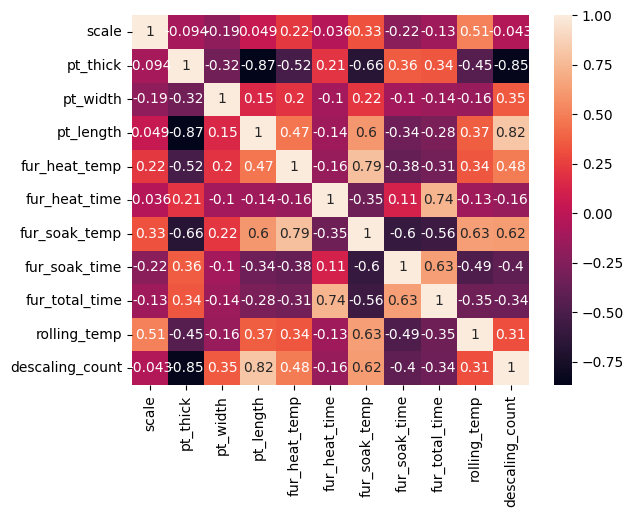

In [36]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [37]:
# 사람에 관련된 부분에선 지양(개선안 도출 어려움)

In [38]:
pd.pivot_table(data=df,index='scale',columns='hsb',values='pt_thick',aggfunc='count')

hsb     미적용     적용
scale             
0       NaN  684.0
1      47.0  263.0

In [39]:
pd.pivot_table(data=df,index='scale',columns='descaling_count',values='pt_thick',aggfunc='count')

descaling_count   5      6     7      8     9      10
scale                                                
0                NaN  174.0   NaN  127.0   NaN  383.0
1                6.0   28.0  20.0  122.0  31.0  103.0

### 모델링

1. Logistic regression

In [40]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (695, 18)
test data size : (299, 18)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rolling_date     994 non-null    object
 1   scale            994 non-null    int64 
 2   steel_kind       994 non-null    object
 3   pt_thick         994 non-null    int64 
 4   pt_width         994 non-null    int64 
 5   pt_length        994 non-null    int64 
 6   hsb              994 non-null    object
 7   fur_no           994 non-null    object
 8   fur_input_row    994 non-null    object
 9   fur_heat_temp    994 non-null    int64 
 10  fur_heat_time    994 non-null    int64 
 11  fur_soak_temp    994 non-null    int64 
 12  fur_soak_time    994 non-null    int64 
 13  fur_total_time   994 non-null    int64 
 14  rolling_method   994 non-null    object
 15  rolling_temp     994 non-null    int64 
 16  descaling_count  994 non-null    int64 
 17  work_group       994 non-null    ob

In [42]:
df_train.shape

(695, 18)

In [46]:
# from_formula 함수를 이용하여 변수 역할 지정
formula = """scale ~ C(steel_kind) + pt_thick + pt_length + C(hsb) + C(fur_no) + C(fur_input_row) +
            fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + fur_total_time +
            C(rolling_method) + rolling_temp + descaling_count + C(work_group)"""

log_model = Logit.from_formula(formula, df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.284938
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      676
Method:                           MLE   Df Model:                           18
Date:                Fri, 09 Aug 2024   Pseudo R-squ.:                  0.5451
Time:                        23:25:54   Log-Likelihood:                -198.03
converged:                      False   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 2.171e-89
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -79.7131   1.79e+04     -0.004      0.996   -3.51e+04    3.49e+04
C(

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
# 회귀계수가 유의한 변수만 사용한 모델
# 회귀계수 유의성 기준 제외변수: REASON, LOAN, MORTDUE, VALUE, YOJ 
log_model = Logit.from_formula("""scale ~ rolling_temp + descaling_count + fur_heat_temp + C(fur_no)""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.405156
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      689
Method:                           MLE   Df Model:                            5
Date:                Fri, 09 Aug 2024   Pseudo R-squ.:                  0.3532
Time:                        23:28:11   Log-Likelihood:                -281.58
converged:                       True   LL-Null:                       -435.37
Covariance Type:            nonrobust   LLR p-value:                 2.352e-64
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -59.6604      7.492     -7.963      0.000     -74.345     -44.976
C(fur_no)[T

In [50]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)  # 0.5 : “1/0” 판정 임계값(1 발생 확률) 변경 가능 
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")

Train 예측 결과 
 817    1
171    1
705    0
301    0
757    1
dtype: int64 

Confusion Matrix: 
[[430  43]
 [ 75 147]] 

Test 예측 결과 
 771    0
986    0
953    0
783    0
203    1
dtype: int64 

Confusion Matrix: 
[[192  19]
 [ 36  52]] 



In [52]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["scale"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")
print(classification_report(df_train["scale"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["scale"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")
print(classification_report(df_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.830

Confusion Matrix: 
[[430  43]
 [ 75 147]] 

              precision    recall  f1-score   support

           0      0.851     0.909     0.879       473
           1      0.774     0.662     0.714       222

    accuracy                          0.830       695
   macro avg      0.813     0.786     0.796       695
weighted avg      0.827     0.830     0.826       695

Test 예측/분류 결과
Accuracy: 0.816

Confusion Matrix: 
[[192  19]
 [ 36  52]] 

              precision    recall  f1-score   support

           0      0.842     0.910     0.875       211
           1      0.732     0.591     0.654        88

    accuracy                          0.816       299
   macro avg      0.787     0.750     0.764       299
weighted avg      0.810     0.816     0.810       299



In [53]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print("Train 예측/분류 결과")
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["scale"], y_pred_test_class, target_names=['승인', '거절'], digits=3))

print("Test 예측/분류 결과")
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["scale"], y_pred_test_class, target_names=['승인', '거절'], digits=3))

Train 예측/분류 결과
              precision    recall  f1-score   support

          승인      0.842     0.910     0.875       211
          거절      0.732     0.591     0.654        88

    accuracy                          0.816       299
   macro avg      0.787     0.750     0.764       299
weighted avg      0.810     0.816     0.810       299

Test 예측/분류 결과
              precision    recall  f1-score   support

          승인      0.842     0.910     0.875       211
          거절      0.732     0.591     0.654        88

    accuracy                          0.816       299
   macro avg      0.787     0.750     0.764       299
weighted avg      0.810     0.816     0.810       299



<Axes: >

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


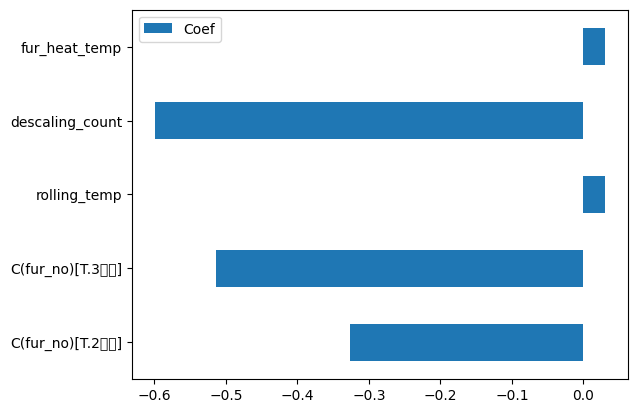

In [54]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))

In [55]:
# 0번째=Intercept..
print(log_result.params.values[0:1])
print(log_model.exog_names[0:1])

[-59.66042715]
['Intercept']


In [57]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df.select_dtypes(include = "object")
df_numeric = df.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

scale  pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
0 -0.673213  0.297380  1.758916  -1.568542      -0.629006       1.138138   
1 -0.673213  0.297380  1.758916  -1.568542      -0.629006       1.365628   
2 -0.673213  0.352984  1.555807  -1.273013      -1.336122       1.138138   
3 -0.673213  0.352984  1.555807  -1.273013      -0.251878       1.479374   
4 -0.673213  0.631008  0.540262  -1.698287      -0.817571       1.820609   

   fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
0      -1.042290      -0.617512        0.531891     -0.098376   
1      -0.926564      -0.908186       -0.017312     -0.051371   
2      -1.736646      -0.811295        0.505738     -0.803452   
3      -1.389468      -0.181501        0.714959     -0.866125   
4      -1.331605      -1.150415        0.191908     -1.054145   

   descaling_count        rolling_date steel_kind hsb fur_no fur_input_row  \
0        -0.353037  03JAN2023:07:07:53          T  적용    1호기            1열   
1        -0.353037  03JAN2023:07:21:22          T  적용    1호기            2열   
2        -0.353037  03JAN2023:07:31:15          T  적용    2호기            1열   
3        -0.353037  03JAN2023:07:41:01          T  적용    2호기            2열   
4        -0.353037  03JAN2023:07:52:40          T  적용    3호기            1열   

  rolling_method work_group  
0     TMCP(온도제어)         1조  
1     TMCP(온도제어)         1조  
2     TMCP(온도제어)         1조  
3     TMCP(온도제어)         1조  
4     TMCP(온도제어)         1조

In [58]:
# BAD 데이터를 0과 1로 변환(정수형), np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["scale"] = np.where(df_scaled["scale"]> 0, 1, 0)
df_scaled.head()

scale  pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
0      0  0.297380  1.758916  -1.568542      -0.629006       1.138138   
1      0  0.297380  1.758916  -1.568542      -0.629006       1.365628   
2      0  0.352984  1.555807  -1.273013      -1.336122       1.138138   
3      0  0.352984  1.555807  -1.273013      -0.251878       1.479374   
4      0  0.631008  0.540262  -1.698287      -0.817571       1.820609   

   fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
0      -1.042290      -0.617512        0.531891     -0.098376   
1      -0.926564      -0.908186       -0.017312     -0.051371   
2      -1.736646      -0.811295        0.505738     -0.803452   
3      -1.389468      -0.181501        0.714959     -0.866125   
4      -1.331605      -1.150415        0.191908     -1.054145   

   descaling_count        rolling_date steel_kind hsb fur_no fur_input_row  \
0        -0.353037  03JAN2023:07:07:53          T  적용    1호기            1열   
1        -0.353037  03JAN2023:07:21:22          T  적용    1호기            2열   
2        -0.353037  03JAN2023:07:31:15          T  적용    2호기            1열   
3        -0.353037  03JAN2023:07:41:01          T  적용    2호기            2열   
4        -0.353037  03JAN2023:07:52:40          T  적용    3호기            1열   

  rolling_method work_group  
0     TMCP(온도제어)         1조  
1     TMCP(온도제어)         1조  
2     TMCP(온도제어)         1조  
3     TMCP(온도제어)         1조  
4     TMCP(온도제어)         1조

In [59]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                               test_size = 0.3, # test 데이터의 비율
                               random_state = 1234)  # random state

In [60]:
# from_formula 함수를 이용하여 변수 역할 지정
# scaled_log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + 
#         DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)

# 선정된 설명변수 기준
scaled_log_model = Logit.from_formula("""scale ~ rolling_temp + descaling_count + fur_heat_temp + C(fur_no)""", df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.403913
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  692
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                            5
Date:                Fri, 09 Aug 2024   Pseudo R-squ.:                  0.3432
Time:                        23:39:54   Log-Likelihood:                -279.51
converged:                       True   LL-Null:                       -425.56
Covariance Type:            nonrobust   LLR p-value:                 4.991e-61
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.6775      0.209     -8.045      0.000      -2.086      -1.269
C(fur_no)[T

<Axes: >

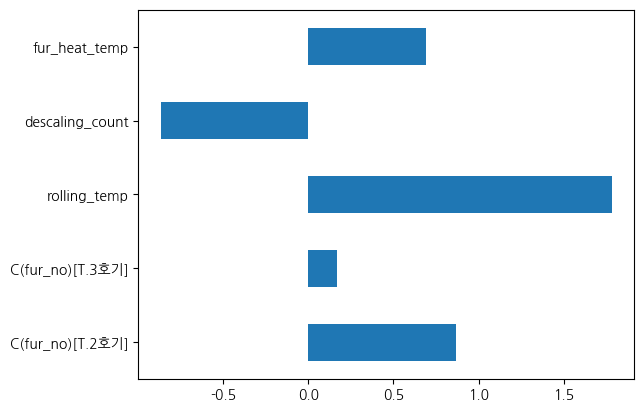

In [63]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'